## Define profiles for runs based on regions in $\tau_v$ vs Z space.


$C(z) = C_0 + C'(z-Hs) + C''(z-Hs)^2$.

Hs: Shelf-break depth (147.5 m)

Hd: Depth of interest, >Hs, about 400 m. 

Z: depth of upwelling

C_0 : Background concentration

**Two regimes**: Belly and No-belly (no umbilical points within $0\le z \le Hd$)

**Belly** $\rightarrow$ $C''\le \frac{C'}{2Hs}$, $C''\ge \frac{C'}{2(Hs-Hd)}$

**No-Belly** $\rightarrow$ $C''>\frac{C'}{2Hs}$, $C''< \frac{C'}{2(Hs-Hd)}$

** Non-dim number $\tau_v$**

$$\tau_v=Z\frac{\delta^2_vC}{\delta_vC}=Z\frac{\delta^2_vC}{\delta_vC}\rvert_{z=Hs}=Z\frac{2C''}{C'}$$


![Alt Text](Img/Map_C2C1_to_TauZ.jpg)


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sympy as sym
import seaborn as sns
sym.init_printing() # enable fancy printing

/Users/Karina/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [13]:
# Set appearance options seaborn
sns.set_style('white')
sns.set_context('talk')

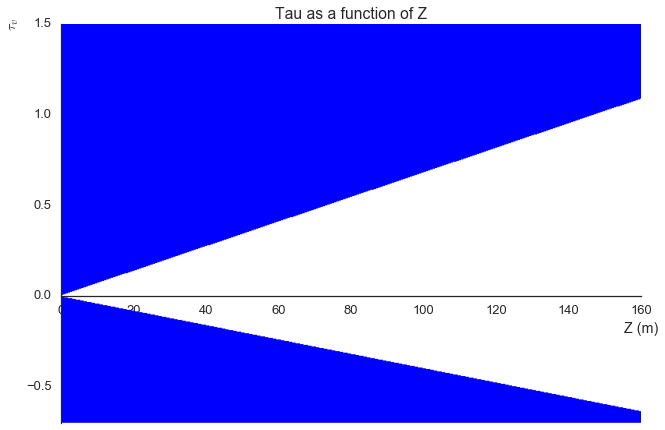

In [14]:
tau,Z = sym.symbols('tau, Z')

# Tau_v vs Z space

p2 = sym.plot_implicit(sym.Or(Z/147.5 < tau, Z/(147.5-400)> tau), (Z, 0, 160),(tau,-0.7,1.5),
                      title='Tau as a function of Z',
                      ylabel=r'$\tau_v$',
                      xlabel='Z (m)')



0.000359322033898
5.93220338983e-05
-5.30693069307e-05
-0.000293069306931


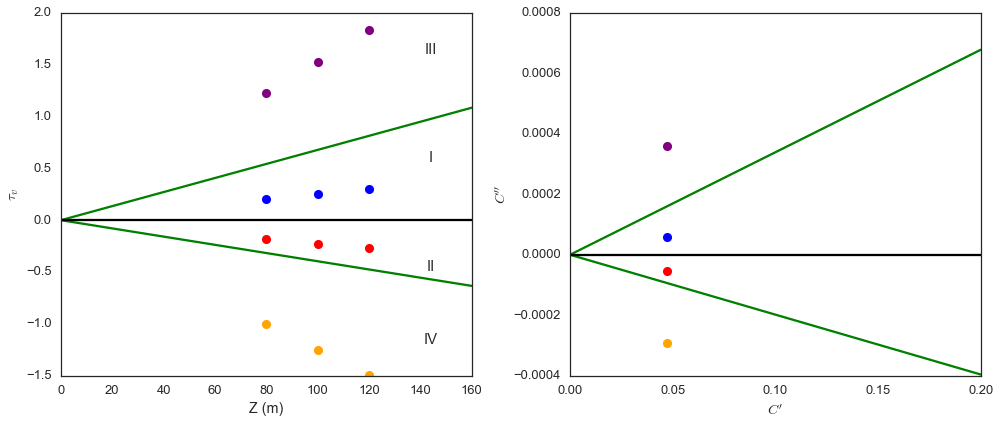

In [71]:
Hs = 147.5
Hd = 400.0

ZZ = np.linspace(0,160,50)
ZZ_exp = np.array([40,60,80,100,120,140])
Zbase = 120 # base case depth of upwelling
Zlow = 80 # base case depth of upwelling
Zlower = 100 # base case depth of upwelling

C1 = np.linspace(0,0.2,50)

#For now, choose only C'>0
C1exp = 0.047 # same as linear profile
C2exp = np.array([(C1exp/(2*Hs))+0.0002,(C1exp/(2*Hs))-0.0001,(C1exp/(2*(Hs-Hd)))+0.00004,(C1exp/(2*(Hs-Hd)))-0.0002])
colours = ['purple','blue','red','orange','magenta']

fig,ax = plt.subplots(1,2,figsize=(14,6))

ax[0].plot(ZZ,ZZ/Hs,'g')
ax[0].plot(ZZ,ZZ/(Hs-Hd),'g')

for ii,cc in zip(range(len(C2exp)),colours):
    ax[0].plot(Zbase,(Zbase*2*C2exp[ii])/C1exp,'o',color=cc)
    ax[0].plot(Zlow,(Zlow*2*C2exp[ii])/C1exp,'o',color=cc)
    ax[0].plot(Zlower,(Zlower*2*C2exp[ii])/C1exp,'o',color=cc)
    print(C2exp[ii])

    

ax[0].axhline(y=0,color='k')
ax[0].set_ylabel(r'$\tau_v$')
ax[0].set_xlabel('Z (m)')
ax[0].text(0.9, 0.9,'III', horizontalalignment='center',verticalalignment='center',transform=ax[0].transAxes,fontsize=15)
ax[0].text(0.9, 0.6,'I', horizontalalignment='center',verticalalignment='center',transform=ax[0].transAxes,fontsize=15)
ax[0].text(0.9, 0.3,'II', horizontalalignment='center',verticalalignment='center',transform=ax[0].transAxes,fontsize=15)
ax[0].text(0.9, 0.1,'IV', horizontalalignment='center',verticalalignment='center',transform=ax[0].transAxes,fontsize=15)

ax[1].plot(C1,C1/(2*Hs),'g')
ax[1].plot(C1,C1/(2*(Hs-Hd)),'g')

for ii,cc in zip(range(len(C2exp)),colours):
    ax[1].plot(C1exp,C2exp[ii],'o',color=cc)

ax[1].axhline(y=0,color='k')
ax[1].set_xlim(0,0.2)
ax[1].set_xlabel('$C\'$')
ax[1].set_ylabel('$C\'\'$')

plt.tight_layout()

What do these profiles look like?


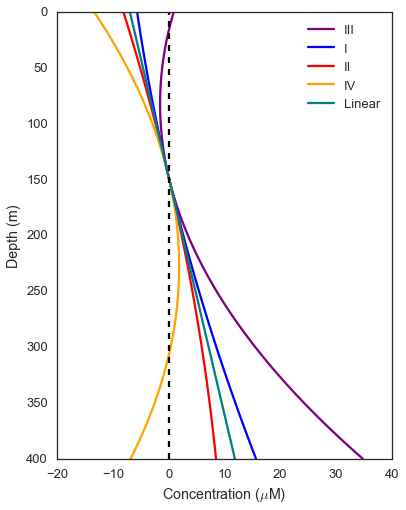

In [62]:
Hs = 147.5
No = 0

z = np.linspace(0,400,50)

fig,ax = plt.subplots(1,1,figsize=(6,8))
labels = ['III','I','II','IV']

for ii,cc,lab in zip(range(len(C2exp)),colours,labels):

    CC = C1exp*(z-Hs)+C2exp[ii]*((z-Hs)**2)
    ax.plot(CC,z, '-', color=cc,label=lab)

ax.plot(C1exp*(z-Hs),z,'-',color='teal',label='Linear')    

ax.set_xlabel('Concentration ($\mu$M)')
ax.set_ylabel('Depth (m)')
ax.invert_yaxis()
ax.axvline(0,linestyle='--' ,color='k')
ax.legend(loc=0)

Add Co to get positive profiles everywhere:

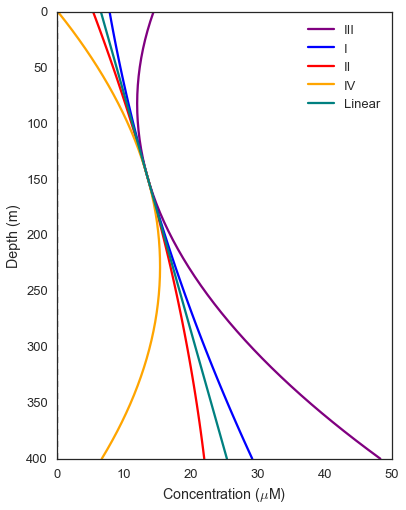

In [70]:
Hs = 147.5
Co = 13.5 # Add 13.5 [C] to get positive profiles

z = np.linspace(0,400,50)

fig,ax = plt.subplots(1,1,figsize=(6,8))
labels = ['III','I','II','IV']

for ii,cc,lab in zip(range(len(C2exp)),colours,labels):

    CC = Co + C1exp*(z-Hs)+C2exp[ii]*((z-Hs)**2)
    ax.plot(CC,z, '-', color=cc,label=lab)

ax.plot(Co + C1exp*(z-Hs),z,'-',color='teal',label='Linear')    

ax.set_xlabel('Concentration ($\mu$M)')
ax.set_ylabel('Depth (m)')
ax.invert_yaxis()
ax.axvline(0,linestyle='--' ,color='k')
ax.legend(loc=0)

Or, same value of $\tau_v$ and see what it implies about C1 and C2? For instance, equivalent profiles. Given a value of $\tau_v$, if the upwelling regime changes (change Z) what will the new values of C1 and C2 be to keep the same $\tau_v$? (Why would this be important? Does it make sense to ask what does the profile have to look like to keep the same regime? I mean, we can't change that in real life...)